In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
import matplotlib.pyplot as plt
import modJoint as MJ
import numpy as np

49.12976330944003
Throwing away 4109 trials with zero [0] spikes


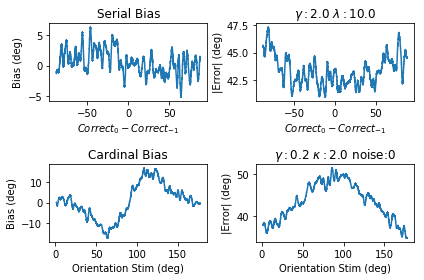

48.73292698176049
Throwing away 3776 trials with zero [0] spikes


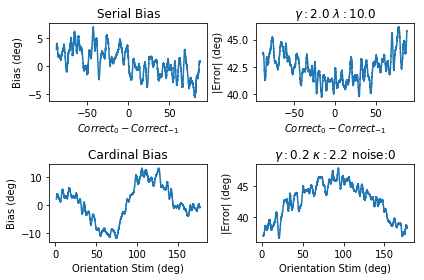

48.147167873473094
Throwing away 3393 trials with zero [0] spikes


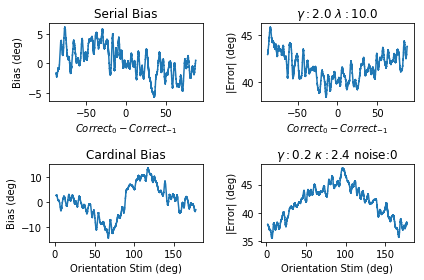

47.522585051169095
Throwing away 3201 trials with zero [0] spikes


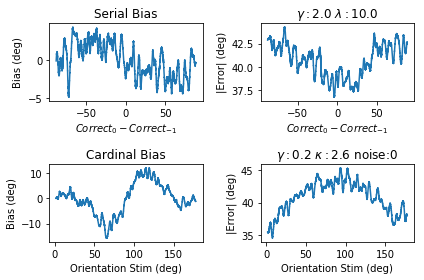

46.642419782747126
Throwing away 2784 trials with zero [0] spikes


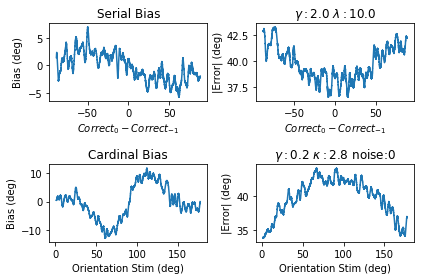

45.945373683085876
Throwing away 2362 trials with zero [0] spikes


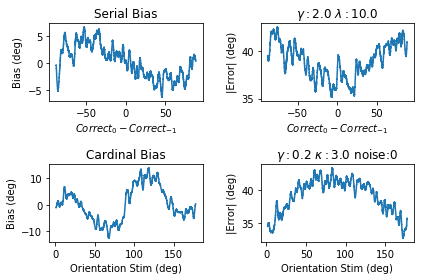

47.02698661449615
Throwing away 2420 trials with zero [0] spikes


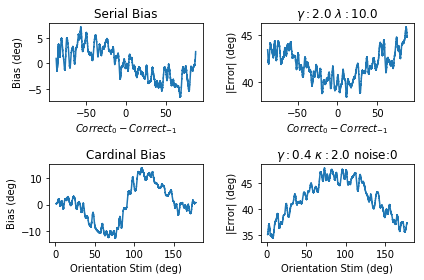

46.229981410227715
Throwing away 2106 trials with zero [0] spikes


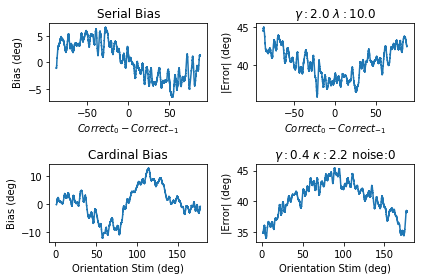

45.28673007330514
Throwing away 1761 trials with zero [0] spikes


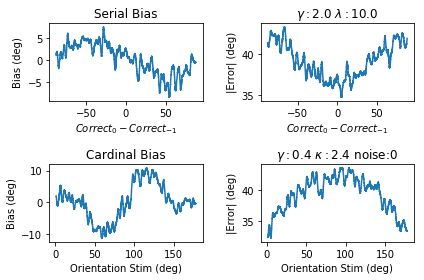

44.27715972223602
Throwing away 1491 trials with zero [0] spikes


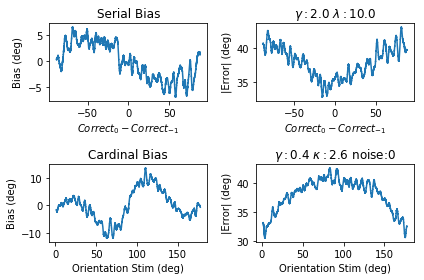

42.85450684977719
Throwing away 1053 trials with zero [0] spikes


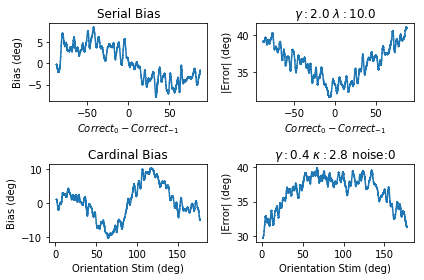

41.48515831223982
Throwing away 875 trials with zero [0] spikes


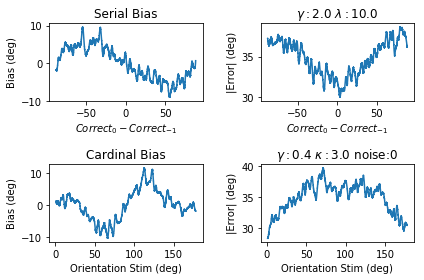

44.9129712647204
Throwing away 1539 trials with zero [0] spikes


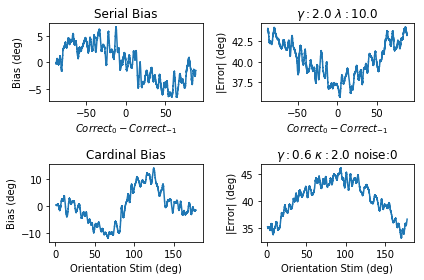

43.88457305923803
Throwing away 1135 trials with zero [0] spikes


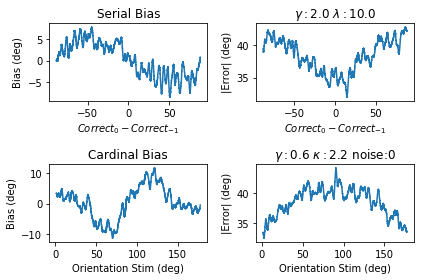

42.4756242460261
Throwing away 860 trials with zero [0] spikes


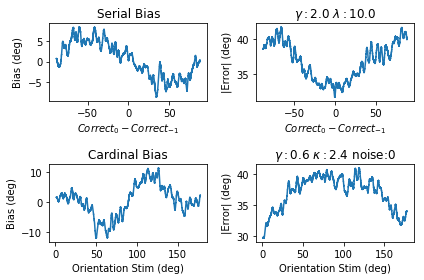

41.08985312794875
Throwing away 647 trials with zero [0] spikes


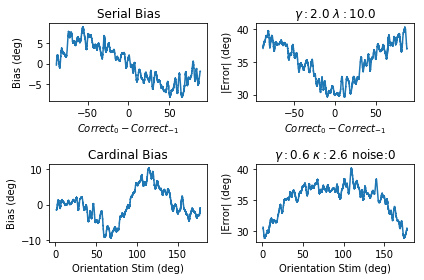

39.579367663867494
Throwing away 442 trials with zero [0] spikes


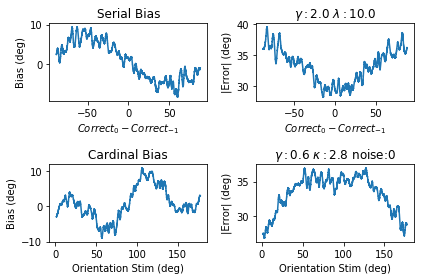

37.731206549438625
Throwing away 269 trials with zero [0] spikes


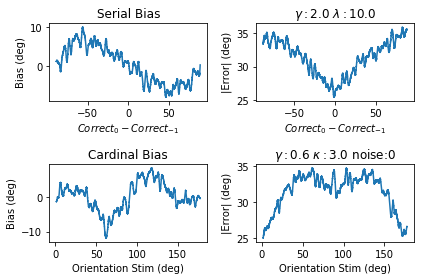

43.24110872757543
Throwing away 888 trials with zero [0] spikes


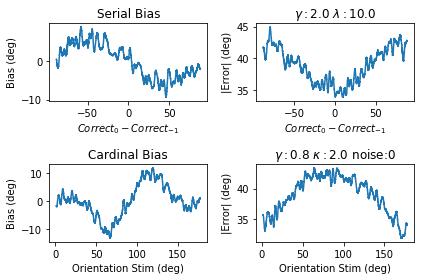

41.96173904344766
Throwing away 673 trials with zero [0] spikes


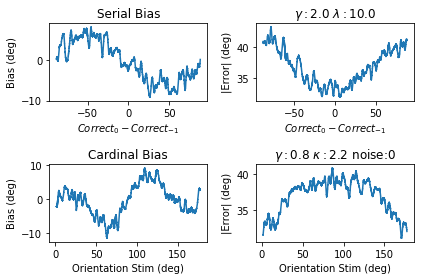

40.17898319067321
Throwing away 499 trials with zero [0] spikes


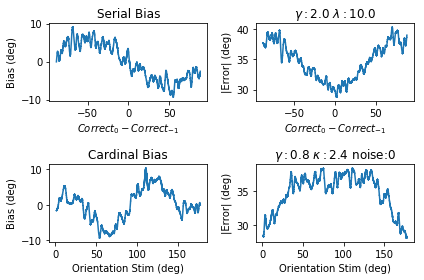

38.47666515544714
Throwing away 303 trials with zero [0] spikes


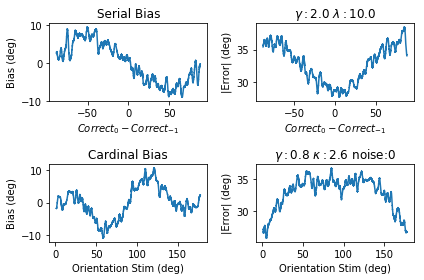

36.7354142746805
Throwing away 170 trials with zero [0] spikes


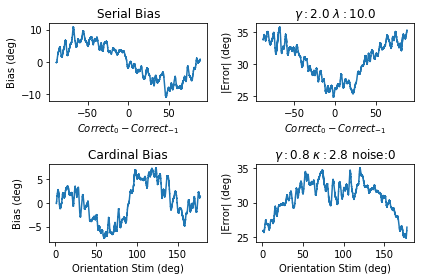

34.525306313624505
Throwing away 103 trials with zero [0] spikes


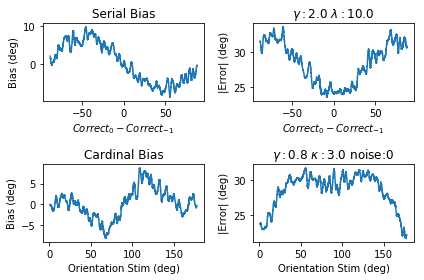

In [23]:
kappaCB = np.arange(2.0,3.1,.2)
gammaCB = np.arange(0.2,0.9,.2)
# kappa 2:4
# gamma .2 -> .8
for gam in gammaCB:
    for kap in kappaCB:
        thisM = MJ.modJoint(kappaCB=kap,gammaCB=gam,noiseCB=0.1)
        thisM.run_model(50000)
        thisM.quick_view_results(sav_root = '_figs/')


# Next steps
* Increase firing rate and add noise 
* add variable uncertainty for SB (that makes sense)


In [21]:
kappaCB

array([], dtype=float64)

In [58]:
foo =  MJ.modJoint(kappaCB = 2.6)
out = foo.run_model(5000)

29.746860819925182
Throwing away 1086 trials with zero [0] spikes


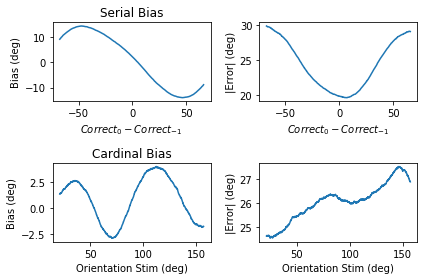

In [59]:
sav_name = '_figs/kappaCB%d.png' %(kap*10)
sav_name
foo.quick_view_results(lwin=1000)

In [43]:
sav_name

'_figs/kappaCB45.png'

In [8]:
plt.plot(out[0],out[1],'k.')

NameError: name 'plt' is not defined

In [44]:
# params to explore
noiseFR = 0
kappaCB = np.arange(1,5,.5)
kappaCB = np.arange(2,2.9,.2)
kappaCB


array([2. , 2.2, 2.4, 2.6, 2.8])

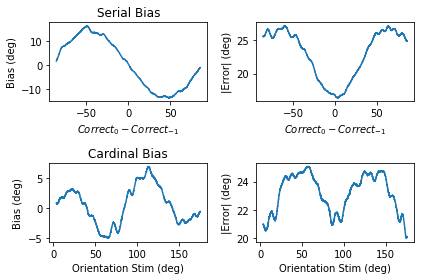

In [46]:
import numpy as np
modelJ.quick_view_results(2000)

36.68844189070449
Throwing away 18444 trials with zero [0] spikes


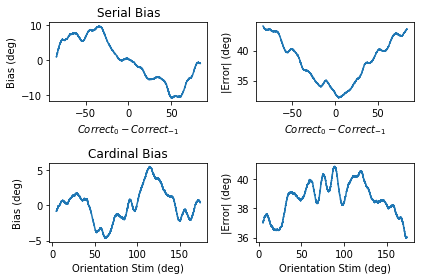

34.25991327381901
Throwing away 15741 trials with zero [0] spikes


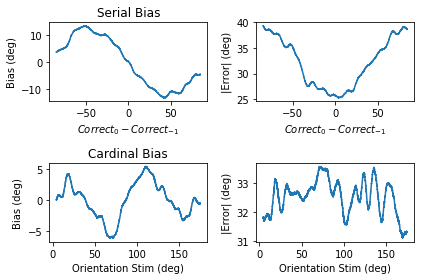

31.805096557067706
Throwing away 13373 trials with zero [0] spikes


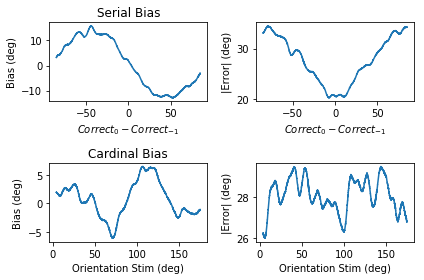

29.157780664817405
Throwing away 10543 trials with zero [0] spikes


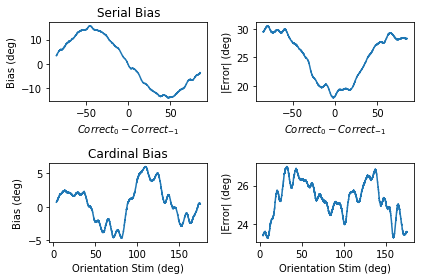

26.38901899718138
Throwing away 7995 trials with zero [0] spikes


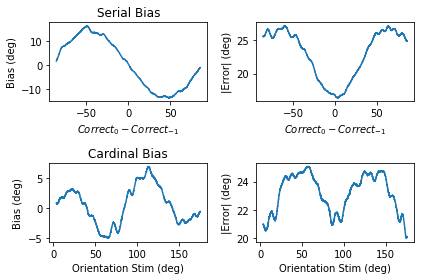

In [45]:
for kap in kappaCB:
    sav_name = '_figs/kappaCB%d.png' %(kap*10)
    modelJ = MJ.modJoint(noiseFR=0,kappaCB=kap)
    out = modelJ.run_model(50000,)
    modelJ.quick_view_results(2000,sav_name)

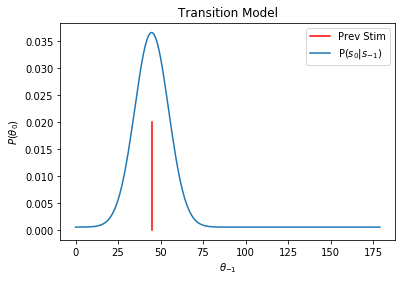

In [266]:
prev_stim = 45
bar = foo.cf(prev_stim)
plt.plot([prev_stim,prev_stim],[0,.02],'r')
plt.plot(bar)
plt.title('Transition Model')
plt.xlabel('$\\theta_{-1}$')
plt.ylabel('$P(\\theta_0)$')
plt.legend(('Prev Stim','P($s_0|s_{-1}$)'))
plt.show()

36.72092828224799
Throwing away 18389 trials with zero [0] spikes


In [8]:
plt.plot(out[0],out[1],'k.')

NameError: name 'plt' is not defined

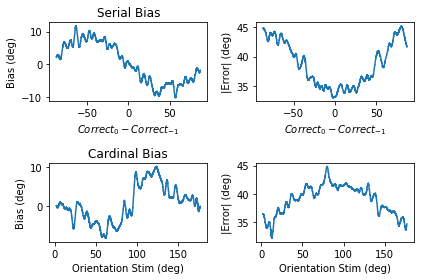

In [15]:
foo.quick_view_results(1000)

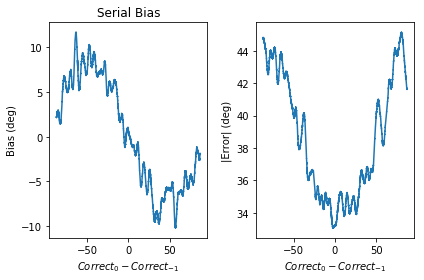

In [17]:
foo.quick_view_sb(l_conv=1000,vis=1)
